1. Importing the necessary libraries to work with the project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

2. We have two datasets and need to merge them into one

In [2]:
df1 = pd.read_csv("index_1.csv")
df2 = pd.read_csv("index_2.csv")
df_combined = pd.concat([df1, df2], ignore_index=True)
df_combined.to_csv("coffee-sales.csv", index=False)

3. Reading the collected dataset and check the structure

In [3]:
df = pd.read_csv('coffee-sales.csv')

In [4]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


4. Looking at the drinks for uniqueness and see ‘Americano with Milk’ and ‘Americano with milk’. These are the same drinks but with different case, so they are doubled in the list

In [5]:
unique_drinks = df['coffee_name'].unique()
print(unique_drinks)

['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino' 'Tea' 'Chocolate with coffee'
 'Chocolate with milk' 'Coffee with Irish whiskey'
 'Irish whiskey with milk' 'Double Irish whiskey' 'Double espresso'
 'Americano with milk' 'Double espresso with milk'
 'Caramel with Irish whiskey' 'Super chocolate' 'Double vanilla'
 'Mochaccino' 'Caramel with chocolate' 'Irish whiskey' 'Caramel coffee'
 'Vanilla with Irish whiskey' 'Chocolate' 'Caramel with milk']


5. Changing the case in the list and check the list for uniqueness again

In [6]:
df['coffee_name'] = df['coffee_name'].str.strip().str.lower().str.capitalize()

In [7]:
unique_drinks = df['coffee_name'].unique()
print(unique_drinks)

['Latte' 'Hot chocolate' 'Americano' 'Americano with milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino' 'Tea' 'Chocolate with coffee'
 'Chocolate with milk' 'Coffee with irish whiskey'
 'Irish whiskey with milk' 'Double irish whiskey' 'Double espresso'
 'Double espresso with milk' 'Caramel with irish whiskey'
 'Super chocolate' 'Double vanilla' 'Mochaccino' 'Caramel with chocolate'
 'Irish whiskey' 'Caramel coffee' 'Vanilla with irish whiskey' 'Chocolate'
 'Caramel with milk']


6. Deriving statistically significant indicators to understand how the cost of beverages by type affects the overall figure for all beverages sold

In [8]:
df = df.dropna(subset=['coffee_name', 'money'])
grouped_stats = df.groupby('coffee_name')['money'].agg(['mean', 'median', 'std', 'min', 'max', 'sum', 'count'])
grouped_stats['cv'] = (grouped_stats['std'] / grouped_stats['mean']) * 100
print(grouped_stats)
mean_value = df['money'].mean()
std_dev = df['money'].std()
cv = (std_dev / mean_value) * 100
print(f"Total coefficient of variation (CV): {cv:.2f}%")

                                 mean  median       std    min   max  \
coffee_name                                                            
Americano                   26.068712   25.96  1.942499  23.02  30.0   
Americano with milk         30.521125   30.86  2.164450  25.00  35.0   
Cappuccino                  35.917174   35.76  2.138369  30.00  40.0   
Caramel coffee              28.000000   28.00       NaN  28.00  28.0   
Caramel with chocolate      28.000000   28.00  0.000000  28.00  28.0   
Caramel with irish whiskey  28.000000   28.00  0.000000  28.00  28.0   
Caramel with milk           25.000000   25.00       NaN  25.00  25.0   
Chocolate                   25.000000   25.00       NaN  25.00  25.0   
Chocolate with coffee       30.000000   30.00  0.000000  30.00  30.0   
Chocolate with milk         27.000000   27.00  0.000000  27.00  27.0   
Cocoa                       35.704348   35.76  1.417267  32.82  40.0   
Coffee with irish whiskey   29.000000   29.00  0.000000  29.00  

7. Finding out what percentage of beverages is broken down by the total number of beverages sold for the entire period of time. 
7.1. Beverages that were sold less than 10 times in the entire period are not significant and we combine them into one group 'Others'

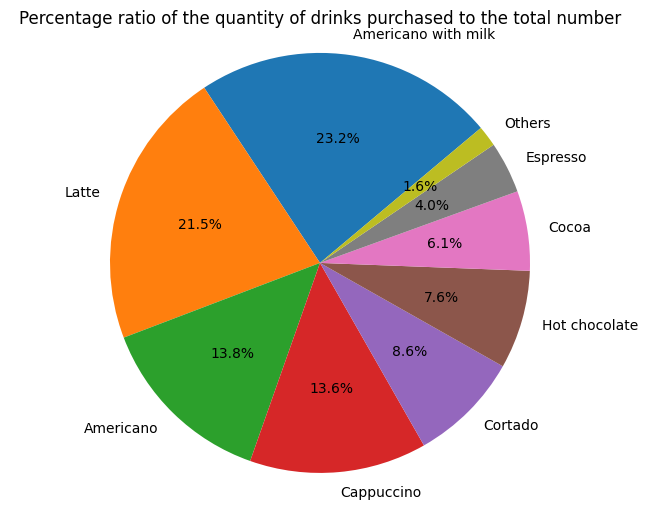

In [9]:
if 'coffee_name' in df.columns:
    coffee_counts = df['coffee_name'].value_counts()
    coffee_counts_filtered = coffee_counts[coffee_counts >= 10]
    other_count = coffee_counts[coffee_counts < 10].sum()
    if other_count > 0:
        coffee_counts_filtered['Others'] = other_count
    coffee_percentage = coffee_counts_filtered / len(df) * 100

    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(coffee_percentage, labels=coffee_percentage.index, autopct='%1.1f%%', startangle=40)
    plt.title('Percentage ratio of the quantity of drinks purchased to the total number')
    plt.axis('equal')
    plt.show()

8. Spliting the date and time column into two different columns ‘date only’ and ‘time only’ for convenient analysis in a time period

In [15]:
df = pd.read_csv('coffee-sales.csv')
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce', utc=True)
    df['date_only'] = df['datetime'].dt.date
    df['time_only'] = df['datetime'].dt.strftime('%H:%M:%S')
    df = df.drop(columns=['datetime'])
    df.to_csv("coffee-sales.csv", index=False)

9. Creating a function to determine a convenient time period that will be broken down by time of day. We analyze what time of day the largest number of drinks is sold 

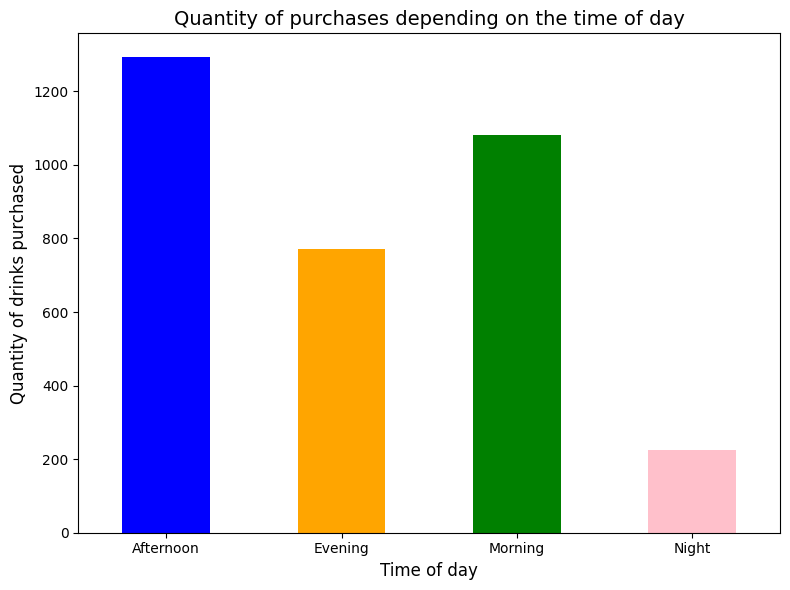

In [16]:
df = pd.read_csv('coffee-sales.csv')
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'  # 5:00 - 11:59
    elif 12 <= hour < 18:
        return 'Afternoon'  # 12:00 - 17:59
    elif 18 <= hour < 22:
        return 'Evening'  # 18:00 - 21:59
    else:
        return 'Night'  # 22:00 - 4:59

df['hour_only'] = pd.to_datetime(df['time_only'], format='%H:%M:%S').dt.hour
df['time_of_day'] = df['hour_only'].apply(time_of_day)
time_of_day_sales = df.groupby('time_of_day').size()
plt.figure(figsize=(8, 6))
time_of_day_sales.plot(kind='bar', color=['blue', 'orange', 'green', 'pink'])
plt.title('Quantity of purchases depending on the time of day', fontsize=14)
plt.xlabel('Time of day', fontsize=12)
plt.ylabel('Quantity of drinks purchased', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

10. Checking which payment method is more popular among customers and its percentage

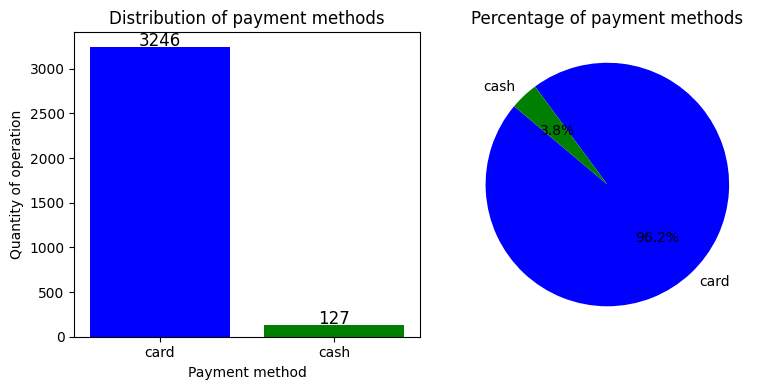

In [17]:
payment_counts = df['cash_type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].bar(payment_counts.index, payment_counts.values, color=['blue', 'green'])
axes[0].set_xlabel("Payment method")
axes[0].set_ylabel("Quantity of operation")
axes[0].set_title("Distribution of payment methods")
for i, v in enumerate(payment_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontsize=12)
axes[1].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=['blue', 'green'], startangle=140)
axes[1].set_title("Percentage of payment methods")
plt.tight_layout()
plt.show()

11. Analysing the ratio of the number of beverages sold by type to the payment method

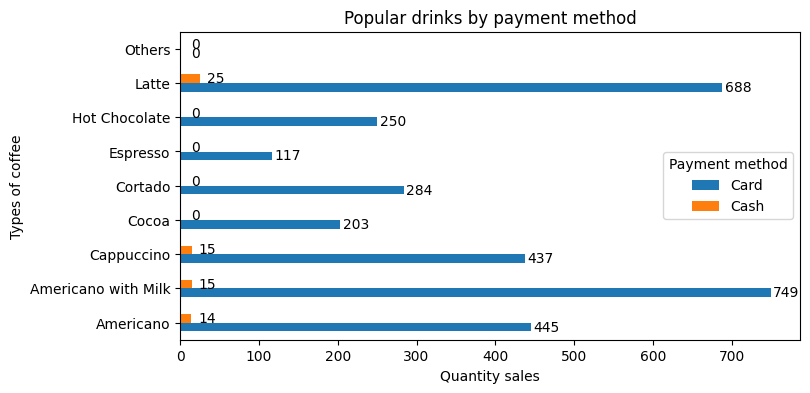

In [23]:
coffee_payment_counts = df.groupby(['coffee_name', 'cash_type']).size().unstack(fill_value=0)
for column in coffee_payment_counts.columns:
    coffee_payment_counts[column] = coffee_payment_counts[column].apply(lambda x: x if x >= 10 else 0)
others = coffee_payment_counts[coffee_payment_counts.sum(axis=1) < 10].sum(axis=0)
coffee_payment_counts = coffee_payment_counts[coffee_payment_counts.sum(axis=1) >= 10]
coffee_payment_counts.loc['Others'] = others
ax = coffee_payment_counts.plot(kind='barh', stacked=False, figsize=(8, 4), color=['#1f77b4', '#ff7f0e'])
plt.title('Popular drinks by payment method')
plt.xlabel('Quantity sales')
plt.ylabel('Types of coffee')
plt.legend(title='Payment method', labels=['Card', 'Cash'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 20, p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                fontsize=10, color='black')
plt.show()

12. Determining peak sales hours and the average check by time of day

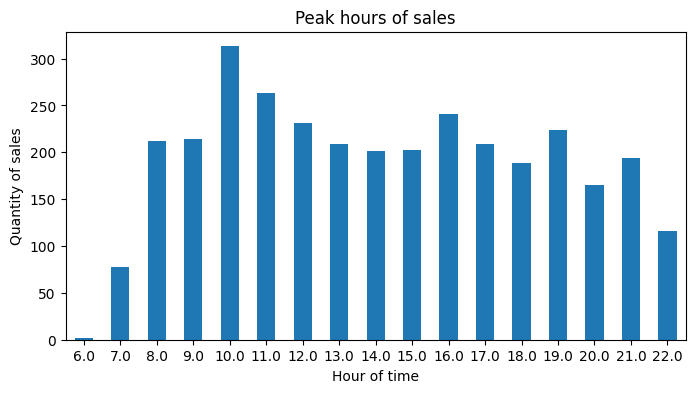

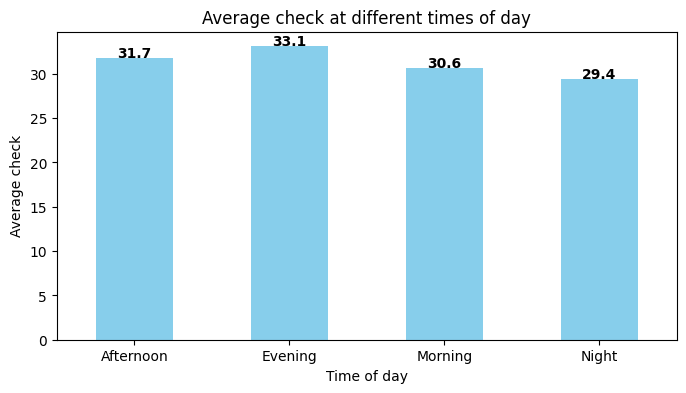

In [19]:
df['time_only'] = pd.to_datetime(df['time_only'], format='%H:%M:%S')
df['hour'] = df['time_only'].dt.hour
sales_by_hour = df.groupby('hour').size()

plt.figure(figsize=(8, 4))
sales_by_hour.plot(kind='bar')
plt.title("Peak hours of sales")
plt.xlabel("Hour of time")
plt.ylabel("Quantity of sales")
plt.xticks(rotation=0)
plt.show()

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(time_of_day)

avg_check_by_time_of_day = df.groupby('time_of_day')['money'].mean()

plt.figure(figsize=(8, 4))
ax = avg_check_by_time_of_day.plot(kind='bar', color='skyblue')

plt.title("Average check at different times of day")
plt.xlabel("Time of day")
plt.ylabel("Average check")
plt.xticks(rotation=0)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 0.1,
            f'{p.get_height():.1f}',
            ha='center',       
            fontsize=10,
            fontweight='bold')

plt.show()

13. Analysing the seasonality of beverage demand depending on the day of the week and month of purchase

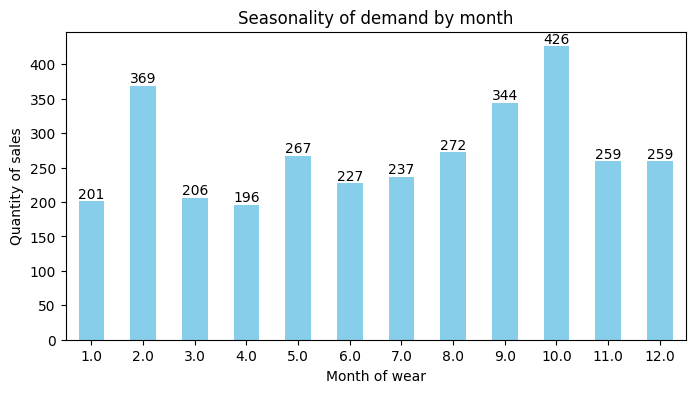

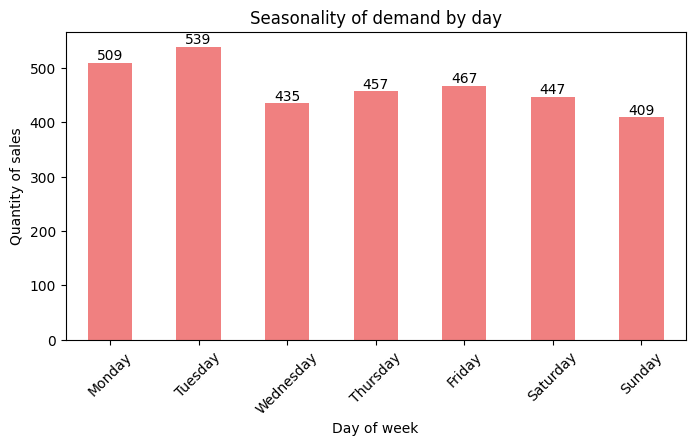

In [20]:
df['date_only'] = pd.to_datetime(df['date_only'])
df['month'] = df['date_only'].dt.month
df['day_of_week'] = df['date_only'].dt.day_name()

sales_by_month = df.groupby('month').size()
plt.figure(figsize=(8, 4))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title("Seasonality of demand by month")
plt.xlabel("Month of wear")
plt.ylabel("Quantity of sales")
plt.xticks(rotation=0)
for i, value in enumerate(sales_by_month):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

order_of_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week = df.groupby('day_of_week').size()
sales_by_day_of_week = sales_by_day_of_week[order_of_days]

plt.figure(figsize=(8, 4))
sales_by_day_of_week.plot(kind='bar', color='lightcoral')
plt.title("Seasonality of demand by day")
plt.xlabel("Day of week")
plt.ylabel("Quantity of sales")
plt.xticks(rotation=45)
for i, value in enumerate(sales_by_day_of_week):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

14. Conducting an analysis to determine the intervals between beverage purchases (mean, most typical interval, and standard deviation)

Average interval between purchases: 159.53 min
Median interval between purchases: 42.74 min
Standard deviation of intervals: 293.00 min


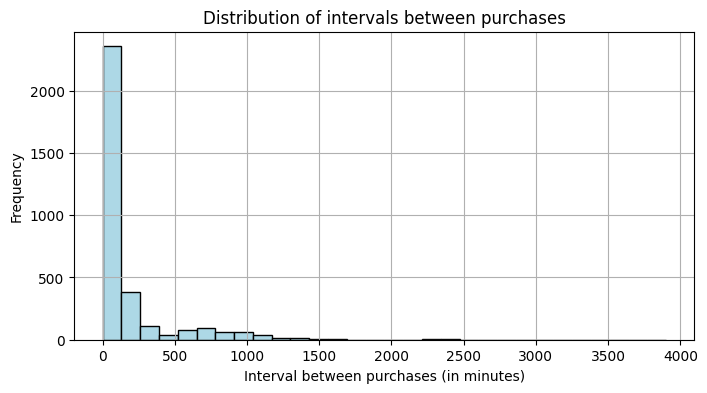

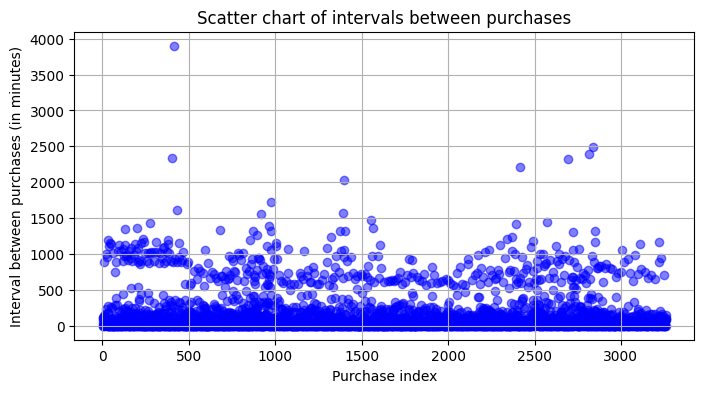

In [21]:
df['date_only'] = pd.to_datetime(df['date_only'], format='%Y-%m-%d', errors='coerce')
df['time_only'] = pd.to_datetime(df['time_only'], format='%H:%M:%S', errors='coerce').dt.time
df = df.dropna(subset=['date_only', 'time_only'])
df['datetime'] = pd.to_datetime(df['date_only'].astype(str) + ' ' + df['time_only'].astype(str))
df = df.sort_values(by='datetime')
df['time_diff'] = df['datetime'].diff().dt.total_seconds()
df = df.dropna(subset=['time_diff'])
df['time_diff_minutes'] = df['time_diff'] / 60

mean_interval = df['time_diff_minutes'].mean()
median_interval = df['time_diff_minutes'].median()
std_interval = df['time_diff_minutes'].std()

print(f"Average interval between purchases: {mean_interval:.2f} min")
print(f"Median interval between purchases: {median_interval:.2f} min")
print(f"Standard deviation of intervals: {std_interval:.2f} min")

plt.figure(figsize=(8, 4))
plt.hist(df['time_diff_minutes'], bins=30, color='lightblue', edgecolor='black')
plt.title("Distribution of intervals between purchases")
plt.xlabel("Interval between purchases (in minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['time_diff_minutes'], color='blue', alpha=0.5)
plt.title("Scatter chart of intervals between purchases")
plt.xlabel("Purchase index")
plt.ylabel("Interval between purchases (in minutes)")
plt.grid(True)
plt.show()

15. Determining the most popular type of drink depending on the time of day

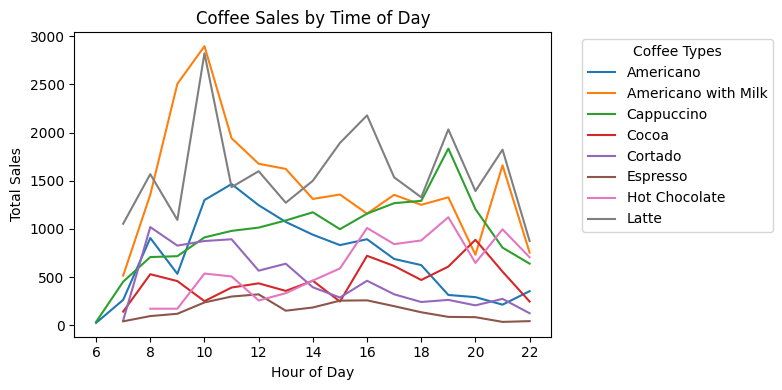

In [22]:
df['time_only'] = pd.to_datetime(df['time_only'], format='%H:%M:%S')
df['hour'] = df['time_only'].dt.hour
coffee_sales_by_time = df.groupby(['hour', 'coffee_name'])['money'].sum().unstack()
coffee_sales_by_time.plot(kind='line', figsize=(8, 4))
plt.title('Coffee Sales by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.legend(title='Coffee Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From the analysis, we can conclude that:
1. Americano with milk and Latte are the most popular drinks in the vending machine.
2. More than 96% of payments are made by card.
3. 10-11 am are the most peak sales hours, although the average check is the highest from 5 to 10 pm.
4. The standard deviation of the interval of 293 minutes indicates an uneven flow of customers.
5. The price of the most popular drinks increased during the sales period.